<a href="https://colab.research.google.com/github/fardinpratama/Project-Machine-Learning/blob/master/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv("/content/datasets_42674_74935_Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Preparation

In [0]:
df = df.rename(columns={'Gender':'gender',
                        'Age':'age',
                        'Annual Income (k$)' : 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

In [12]:
df['gender'] =df['gender'].replace(['Male','Female'],[1,0])
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [0]:
X = df.drop(['CustomerID','gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  model_km = KMeans(n_clusters=i).fit(X)
  clusters.append(model_km.inertia_)

Text(0, 0.5, 'Inertia')

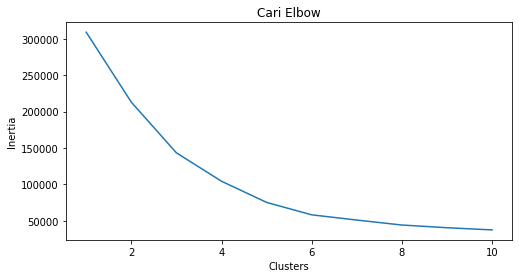

In [15]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5.

In [0]:
#melatih model berdasarakan K terbaik
model_km = KMeans(n_clusters=5).fit(X)

In [0]:
#menambah kolom label pada tabel
X['label'] = model_km.labels_

In [19]:
X.head()

,age,annual_income,spending_score,label
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


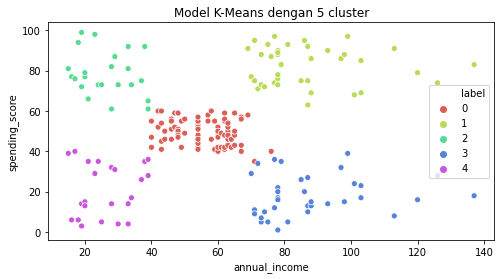

In [20]:
# membuat plot hasil model yang telah dilatih
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['label'], palette=sns.color_palette('hls', 5))
plt.title('Model K-Means dengan 5 cluster')
plt.show()